# *Project -* **Topic Classification**
*Subject -* Natural Language Processing 

## Count words

In [1]:
import string
import re
import joblib


In [183]:
str_ = "Will it extend your life by removing a fast-growing tumor? Will your quality of life improve by making it easier to walk? Will it prevent you from becoming disabled, akin to a hip replacement? Just because an abnormality such as a hernia has been found doesn’t mean it has to be addressed, especially if you don’t have bothersome symptoms and the procedure comes with complications."

In [184]:
def process_text(text):
    text = text.lower()
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", " ", text
    )
    text = " ".join(text.split())
    return text

In [185]:
str1 = process_text(str_)
#str1

In [186]:
str1 = str1.split()
#str1

In [187]:
c=0
for i in str1:
  c+=1;
c

66

## Import data

In [131]:
import pandas as pd

In [188]:
df_train = pd.read_csv("/content/df_train.csv")
df_train = df_train[["Doc", "Categories"]]
df_train = df_train.dropna()
#df_train

df_test = pd.read_csv("/content/df_test.csv")
df_test = df_test[["Doc", "Categories"]]
df_test = df_test.dropna()


In [190]:
X_train = df_train["Doc"]
X_test = df_test["Doc"]
y_train = df_train["Categories"]
y_test = df_test["Categories"]

## SVM Train, Test

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import metrics
import seaborn as sns

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [192]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         Car       1.00      1.00      1.00         2
     Fashion       0.67      1.00      0.80         2
      Health       1.00      0.33      0.50         3
       Sport       0.75      1.00      0.86         3

    accuracy                           0.80        10
   macro avg       0.85      0.83      0.79        10
weighted avg       0.86      0.80      0.77        10



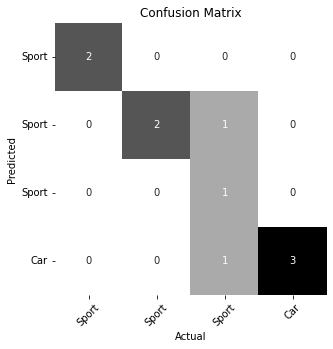

In [193]:
cnf_mat = confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(y_test, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(predicted, rotation=0)

plt.title('Confusion Matrix')

plt.show()